In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skgarden import RandomForestQuantileRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, KFold

%matplotlib inline

In [3]:
boston = load_boston()

In [5]:
X, y = boston.data, boston.target
kf = KFold(n_splits=5)
rfqr = RandomForestQuantileRegressor(
    random_state=123, min_samples_split=10, n_estimators=1000)

In [7]:
# Store values at 2.5 and 97.5 percentiles
y_true_all = []
lower, upper = [], []
for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (
        X[train_index], X[test_index], y[train_index], y[test_index])
    rfqr.set_params(max_features=X_train.shape[1] // 3)
    rfqr.fit(X_train, y_train)
    y_true_all = np.concatenate((y_true_all, y_test))
    upper = np.concatenate((upper, rfqr.predict(X_test, quantile=97.5)))
    lower = np.concatenate((lower, rfqr.predict(X_test, quantile=2.5)))
interval = upper - lower
sort_ind = np.argsort(interval)
y_true_all = y_true_all[sort_ind]
upper = upper[sort_ind]
lower = lower[sort_ind]
mean = (upper + lower) / 2

# Center mean at 0
y_true_all -= mean
upper -= mean
lower -= mean

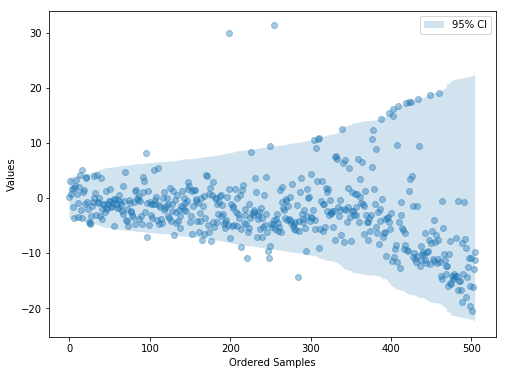

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(y_true_all, 'o', alpha=0.4)
plt.fill_between(
    np.arange(len(upper)), lower, upper, alpha=0.2, label='95% CI')
plt.xlabel('Ordered Samples')
plt.ylabel('Values')
plt.legend();